# Import Library

In [192]:
import pandas as pd

# Download Meta Kaggle Datasets

In [193]:
import kagglehub

MK_PATH = kagglehub.dataset_download("kaggle/meta-kaggle")
MKC_PATH = kagglehub.dataset_download("kaggle/meta-kaggle-code")

print("Path to Meta-Kaggle dataset files:", MK_PATH)
print("Path to Meta-Kaggle-Code dataset files:", MKC_PATH)

Path to Meta-Kaggle dataset files: /kaggle/input/meta-kaggle
Path to Meta-Kaggle-Code dataset files: /kaggle/input/meta-kaggle-code


# Data Cleaning

In [194]:
kernel_ver=pd.read_csv('/kaggle/input/meta-kaggle/KernelVersions.csv')  #read KernelVersions.csv data

/tmp/ipykernel_36/3111039531.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  kernel_ver=pd.read_csv('/kaggle/input/meta-kaggle/KernelVersions.csv')  #read KernelVersions.csv data


In [195]:
kernel_ver.info()   #check number of rows and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15279234 entries, 0 to 15279233
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Id                          int64  
 1   ScriptId                    int64  
 2   ParentScriptVersionId       float64
 3   ScriptLanguageId            int64  
 4   AuthorUserId                int64  
 5   CreationDate                object 
 6   VersionNumber               float64
 7   Title                       object 
 8   EvaluationDate              object 
 9   IsChange                    bool   
 10  TotalLines                  float64
 11  LinesInsertedFromPrevious   float64
 12  LinesChangedFromPrevious    float64
 13  LinesUnchangedFromPrevious  float64
 14  LinesInsertedFromFork       float64
 15  LinesDeletedFromFork        float64
 16  LinesChangedFromFork        float64
 17  LinesUnchangedFromFork      float64
 18  TotalVotes                  int64  
 19  IsInternetEnabled  

In [196]:
kernel_ver.shape   #check row and column number

(15279234, 23)

In [197]:
kernel_ver.isnull().sum()    #check number of null values in each column

Id                                   0
ScriptId                             0
ParentScriptVersionId         15127893
ScriptLanguageId                     0
AuthorUserId                         0
CreationDate                         0
VersionNumber                  9280604
Title                            13208
EvaluationDate                 1176922
IsChange                             0
TotalLines                     9227334
LinesInsertedFromPrevious      9123283
LinesChangedFromPrevious       9123283
LinesUnchangedFromPrevious     9123283
LinesInsertedFromFork         14259017
LinesDeletedFromFork          14259017
LinesChangedFromFork          14259017
LinesUnchangedFromFork        14259017
TotalVotes                           0
IsInternetEnabled                    0
RunningTimeInMilliseconds        27184
AcceleratorTypeId                    0
DockerImage                    1623530
dtype: int64

In [198]:
kernels=pd.read_csv('/kaggle/input/meta-kaggle/Kernels.csv') #read Kernels.csv dataset

In [199]:
kernels.info()  #check number of rows and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528380 entries, 0 to 1528379
Data columns (total 16 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Id                         1528380 non-null  int64  
 1   AuthorUserId               1528380 non-null  int64  
 2   CurrentKernelVersionId     1322201 non-null  float64
 3   ForkParentKernelVersionId  321013 non-null   float64
 4   ForumTopicId               202887 non-null   float64
 5   FirstKernelVersionId       1526799 non-null  float64
 6   CreationDate               1528193 non-null  object 
 7   EvaluationDate             1496830 non-null  object 
 8   MadePublicDate             1504264 non-null  object 
 9   IsProjectLanguageTemplate  1528380 non-null  bool   
 10  CurrentUrlSlug             1528378 non-null  object 
 11  Medal                      119741 non-null   float64
 12  MedalAwardDate             158833 non-null   object 
 13  TotalViews  

In [200]:
kernels.isnull().sum()  #check number of null values in each column

Id                                 0
AuthorUserId                       0
CurrentKernelVersionId        206179
ForkParentKernelVersionId    1207367
ForumTopicId                 1325493
FirstKernelVersionId            1581
CreationDate                     187
EvaluationDate                 31550
MadePublicDate                 24116
IsProjectLanguageTemplate          0
CurrentUrlSlug                     2
Medal                        1408639
MedalAwardDate               1369547
TotalViews                         0
TotalComments                      0
TotalVotes                         0
dtype: int64

In [201]:
#selecting some columns and dropping others
kernel_ver_cleaned= kernel_ver[['AuthorUserId','ScriptId', 'ParentScriptVersionId', 'CreationDate', 'VersionNumber', 'Title',
                                'TotalLines', 'TotalVotes', 'RunningTimeInMilliseconds']]


In [202]:
kernel_ver_cleaned.info() #check number of rows and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15279234 entries, 0 to 15279233
Data columns (total 9 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   AuthorUserId               int64  
 1   ScriptId                   int64  
 2   ParentScriptVersionId      float64
 3   CreationDate               object 
 4   VersionNumber              float64
 5   Title                      object 
 6   TotalLines                 float64
 7   TotalVotes                 int64  
 8   RunningTimeInMilliseconds  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 1.0+ GB


In [203]:
#Selecting 15,000 rows only from dataframe due to limited space
kernel_ver_cleaned=kernel_ver_cleaned.sample(15000)  

In [204]:
#selecting some columns and dropping others
kernels_cleaned= kernels[['AuthorUserId', 'CurrentKernelVersionId', 'ForkParentKernelVersionId',
                          'CreationDate', 'MadePublicDate', 'CurrentUrlSlug', 'Medal', 'MedalAwardDate',
                          'TotalViews', 'TotalComments', 'TotalVotes']]

In [205]:
#Selecting 15,000 rows only from dataframe due to limited space
kernels_cleaned=kernels_cleaned.sample(15000)  

In [206]:
# Merge two datasets (kernels_cleaned, kernel_ver_cleaned) using AuthorUserId column
kernels_and_kernel_ver=pd.merge(kernels_cleaned, kernel_ver_cleaned, on='AuthorUserId')

In [207]:
kernels_and_kernel_ver

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,AuthorUserId,CurrentKernelVersionId,ForkParentKernelVersionId,CreationDate_x,MadePublicDate,CurrentUrlSlug,Medal,MedalAwardDate,TotalViews,TotalComments,TotalVotes_x,ScriptId,ParentScriptVersionId,CreationDate_y,VersionNumber,Title,TotalLines,TotalVotes_y,RunningTimeInMilliseconds
0,2080166,55797870.0,NaN,03/04/2021 11:06:56,03/04/2021,starter-sap-bikes-sales-sample-data-21be6a8d-e,NaN,NaN,615,0,3,2302700,NaN,03/07/2019 21:23:10,25044.0,Starter: [Dataset no longer available] a865c1ad-0,109.0,0,15917.0
1,2080166,55797870.0,NaN,03/04/2021 11:06:56,03/04/2021,starter-sap-bikes-sales-sample-data-21be6a8d-e,NaN,NaN,615,0,3,2302700,NaN,12/24/2018 08:48:07,4446.0,Starter: Parking Garage Data 54ed16df-d,109.0,0,20529.0
2,2080166,55797870.0,NaN,03/04/2021 11:06:56,03/04/2021,starter-sap-bikes-sales-sample-data-21be6a8d-e,NaN,NaN,615,0,3,9189524,NaN,04/29/2020 12:38:52,1.0,Starter: chinese-ocr-l1 798ff486-0,88.0,0,11154.0
3,2080166,55797870.0,NaN,03/04/2021 11:06:56,03/04/2021,starter-sap-bikes-sales-sample-data-21be6a8d-e,NaN,NaN,615,0,3,2302700,NaN,12/25/2018 18:13:09,4841.0,Starter: Parking Garage Data d6e14c70-1,109.0,0,13902.0
4,2080166,55797870.0,NaN,03/04/2021 11:06:56,03/04/2021,starter-sap-bikes-sales-sample-data-21be6a8d-e,NaN,NaN,615,0,3,2302700,NaN,07/30/2019 17:19:21,62140.0,Starter: [Dataset no longer available] ffe66974-e,109.0,0,14064.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84769,2080166,28966879.0,NaN,02/20/2020 15:37:38,02/20/2020,starter-dataset-ec3c852d-5,NaN,NaN,57,0,0,7574698,NaN,01/17/2020 07:38:24,1.0,Starter: N-BaIoT - Data to detect IoT 296f4a11-5,155.0,0,86444.0
84770,2080166,28966879.0,NaN,02/20/2020 15:37:38,02/20/2020,starter-dataset-ec3c852d-5,NaN,NaN,57,0,0,10732015,NaN,07/17/2020 21:21:39,1.0,Starter: mrf_lstm 3eef98c2-7,88.0,0,14113.0
84771,2080166,28966879.0,NaN,02/20/2020 15:37:38,02/20/2020,starter-dataset-ec3c852d-5,NaN,NaN,57,0,0,1899337,NaN,09/14/2019 09:01:32,109.0,Starter: Advance U.S. International 35535252-f,136.0,0,10395.0
84772,2080166,28966879.0,NaN,02/20/2020 15:37:38,02/20/2020,starter-dataset-ec3c852d-5,NaN,NaN,57,0,0,6639636,NaN,11/15/2019 19:37:49,1.0,Starter: Kaggle Survey 2019 - 33b6d373-1,113.0,0,17417.0


In [208]:
comp=pd.read_csv('/kaggle/input/meta-kaggle/Competitions.csv') #read Competitions.csv dataset

In [209]:
comp.info()   #check number of rows and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9817 entries, 0 to 9816
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Id                                9817 non-null   int64  
 1   Slug                              9817 non-null   object 
 2   Title                             9817 non-null   object 
 3   Subtitle                          9802 non-null   object 
 4   HostSegmentTitle                  9817 non-null   object 
 5   ForumId                           5745 non-null   float64
 6   OrganizationId                    638 non-null    float64
 7   EnabledDate                       9817 non-null   object 
 8   DeadlineDate                      9817 non-null   object 
 9   ProhibitNewEntrantsDeadlineDate   394 non-null    object 
 10  TeamMergerDeadlineDate            388 non-null    object 
 11  TeamModelDeadlineDate             308 non-null    object 
 12  ModelS

# Data Analysis

In [210]:
kernels_and_kernel_ver.sample() #view sample row

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,AuthorUserId,CurrentKernelVersionId,ForkParentKernelVersionId,CreationDate_x,MadePublicDate,CurrentUrlSlug,Medal,MedalAwardDate,TotalViews,TotalComments,TotalVotes_x,ScriptId,ParentScriptVersionId,CreationDate_y,VersionNumber,Title,TotalLines,TotalVotes_y,RunningTimeInMilliseconds
68774,2080166,32192444.0,NaN,04/17/2020 17:17:10,04/17/2020,starter-ucf101-8d799f65-d,NaN,NaN,126,0,0,2302700,NaN,08/02/2019 06:38:09,62883.0,Starter: [Dataset no longer available] 2eaef14b-0,109.0,0,12367.0


In [211]:
kernels_and_kernel_ver['CreationDate_x'].dtype #check datatype

dtype('O')

In [212]:
#convert CreationDate_x column to datetime datatype
kernels_and_kernel_ver['CreationDate_x'] = pd.to_datetime(kernels_and_kernel_ver['CreationDate_x'])

In [213]:
#create new column 'create_year' to include year only
kernels_and_kernel_ver['create_year'] = kernels_and_kernel_ver['CreationDate_x'].dt.year

In [214]:
kernels_and_kernel_ver.sample() #view sample row

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,AuthorUserId,CurrentKernelVersionId,ForkParentKernelVersionId,CreationDate_x,MadePublicDate,CurrentUrlSlug,Medal,MedalAwardDate,TotalViews,TotalComments,TotalVotes_x,ScriptId,ParentScriptVersionId,CreationDate_y,VersionNumber,Title,TotalLines,TotalVotes_y,RunningTimeInMilliseconds,create_year
73321,2080166,42774577.0,NaN,2020-09-16 02:11:20,09/16/2020,starter-birdsbestpretrained8-e5adb8d2-e,NaN,NaN,34,0,0,1899337,NaN,09/14/2019 09:01:32,109.0,Starter: Advance U.S. International 35535252-f,136.0,0,10395.0,2020


In [215]:
kernels_and_kernel_ver['create_year'].value_counts()  #check frequency of years

create_year
2020    42119
2019    18607
2018    11855
2021     7847
2022     1084
2025     1075
2024     1069
2023      929
2016       87
2017       69
2015       33
Name: count, dtype: int64

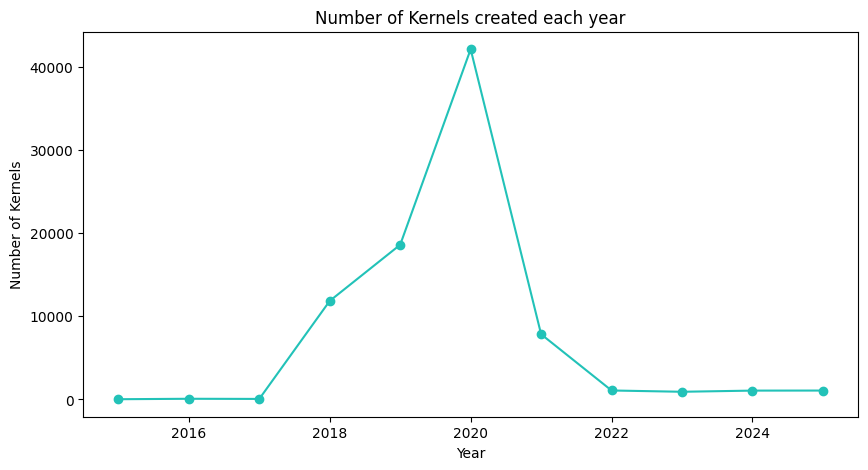

In [216]:
#create line graph for kernels created per year
create_year_plot=kernels_and_kernel_ver['create_year'].value_counts().sort_index().plot(kind='line', figsize=(10, 5), marker='o', color='#22c2b8')
create_year_plot.set_xlabel('Year')
create_year_plot.set_ylabel('Number of Kernels')
create_year_plot.set_title('Number of Kernels created each year');

In [217]:
kernels_and_kernel_ver['MadePublicDate'].dtype  #check datatype

dtype('O')

In [218]:
#convert MadePublicDate column to datetime datatype
kernels_and_kernel_ver['MadePublicDate'] = pd.to_datetime(kernels_and_kernel_ver['MadePublicDate'])

In [219]:
#create new column publish_year to include year only
kernels_and_kernel_ver['publish_year'] = kernels_and_kernel_ver['MadePublicDate'].dt.year

In [220]:
kernels_and_kernel_ver['publish_year'].value_counts()  #check frequency of years

publish_year
2020.0    42111
2021.0     7829
2019.0     2111
2025.0     1109
2022.0     1103
2024.0     1071
2023.0      905
2018.0       99
2016.0       87
2017.0       68
2015.0       33
Name: count, dtype: int64

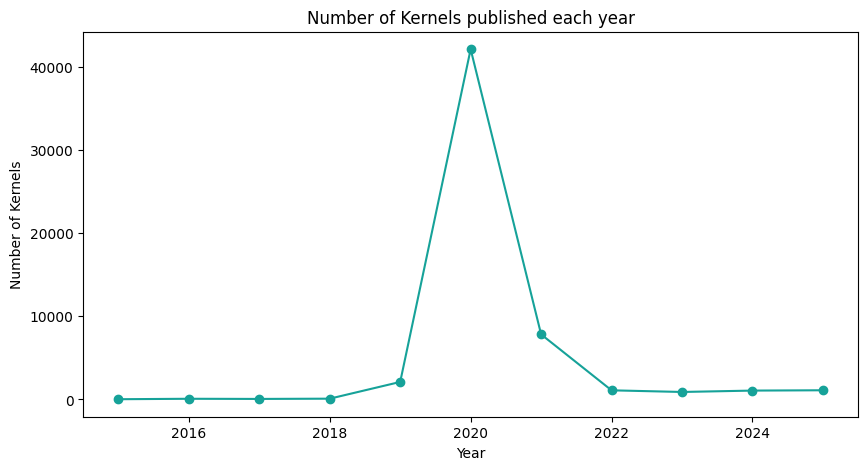

In [221]:
#create line graph for publicized kernels per year
publish_year_plot=kernels_and_kernel_ver['publish_year'].value_counts().sort_index().plot(kind='line', figsize=(10, 5), marker='o', color='#16a299')
publish_year_plot.set_xlabel('Year')
publish_year_plot.set_ylabel('Number of Kernels')
publish_year_plot.set_title('Number of Kernels published each year');

In [222]:
#create new dataframe to include rows that has medals
medal= kernels_and_kernel_ver[kernels_and_kernel_ver['Medal'].notnull()] 

In [223]:
medal.info()  #check number of rows and datatypes

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 132 to 84612
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   AuthorUserId               920 non-null    int64         
 1   CurrentKernelVersionId     920 non-null    float64       
 2   ForkParentKernelVersionId  223 non-null    float64       
 3   CreationDate_x             920 non-null    datetime64[ns]
 4   MadePublicDate             920 non-null    datetime64[ns]
 5   CurrentUrlSlug             920 non-null    object        
 6   Medal                      920 non-null    float64       
 7   MedalAwardDate             920 non-null    object        
 8   TotalViews                 920 non-null    int64         
 9   TotalComments              920 non-null    int64         
 10  TotalVotes_x               920 non-null    int64         
 11  ScriptId                   920 non-null    int64         
 12  ParentScr

In [224]:
#convert MedalAwardDate column to datetime datatype
medal['MedalAwardDate'] = pd.to_datetime(medal['MedalAwardDate'])

/tmp/ipykernel_36/96995757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medal['MedalAwardDate'] = pd.to_datetime(medal['MedalAwardDate'])


In [225]:
#create new column 'medal_year' to include year only
medal['medal_year'] = medal['MedalAwardDate'].dt.year

/tmp/ipykernel_36/1884486473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medal['medal_year'] = medal['MedalAwardDate'].dt.year


In [226]:
medal['medal_year'].dtype #check datatype

dtype('int32')

In [227]:
medal['medal_year'].value_counts() #check frequency of years

medal_year
2025    281
2024    172
2023    138
2022    122
2021    104
2020     47
2019     25
2018     14
2017     14
2016      3
Name: count, dtype: int64

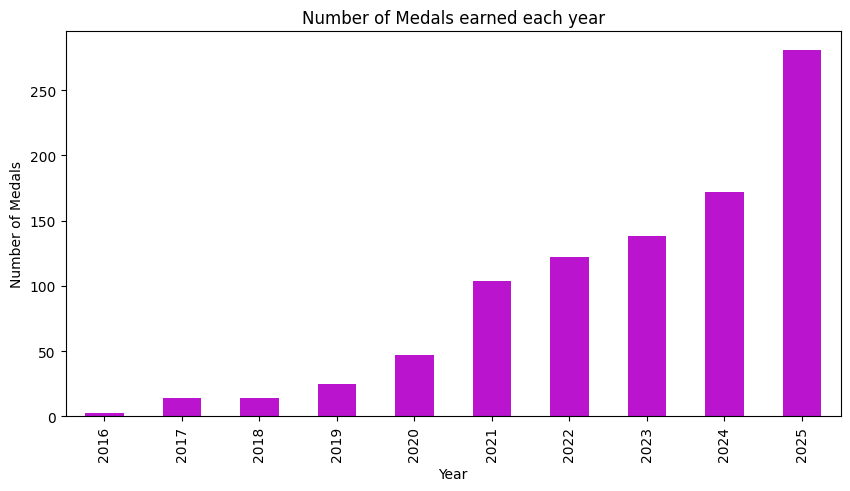

In [228]:
#create bar graph for number of medals per year
medal_year_plot = medal['medal_year'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), color='#ba14ce')
medal_year_plot.set_xlabel('Year')
medal_year_plot.set_ylabel('Number of Medals')
medal_year_plot.set_title('Number of Medals earned each year');

In [229]:
kernels_and_kernel_ver['TotalViews'].dtype  #check datatype

dtype('int64')

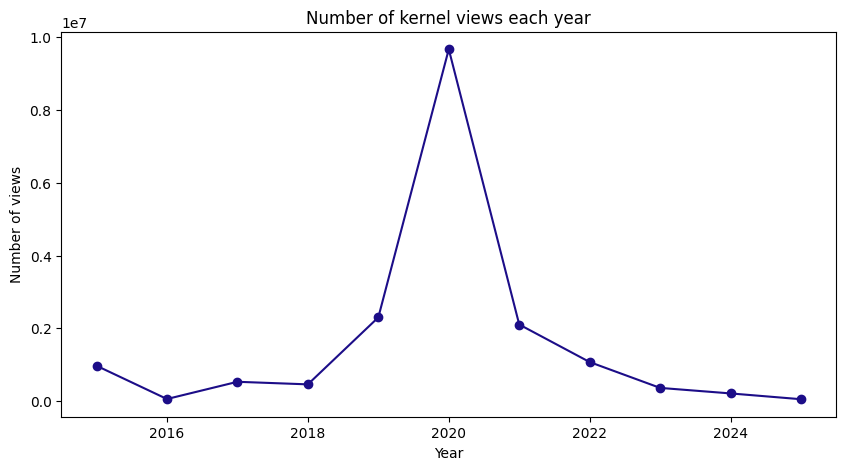

In [230]:
#create line graph for kernel views per year
views_plot=kernels_and_kernel_ver.groupby('publish_year')['TotalViews'].sum().plot(kind='line', figsize=(10, 5), color='#1c0d88', marker='o')
views_plot.set_xlabel('Year')
views_plot.set_ylabel('Number of views')
views_plot.set_title('Number of kernel views each year');

In [231]:
kernels_and_kernel_ver['TotalLines'].dtype  #check datatype

dtype('float64')

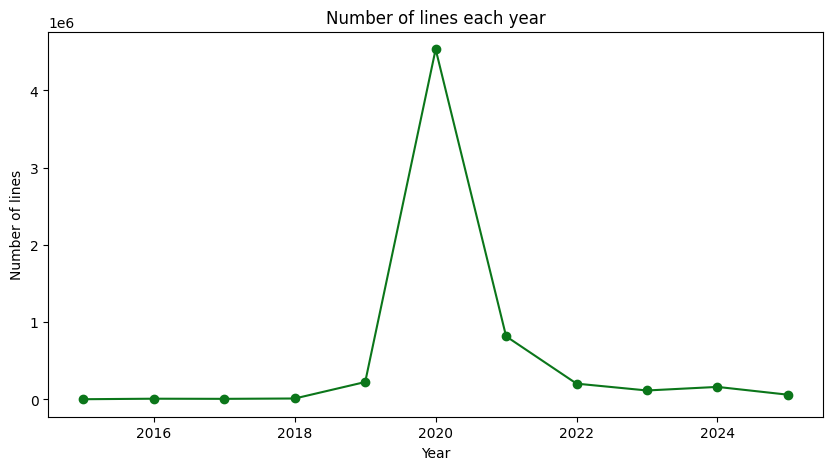

In [232]:
#create line graph for number of code lines per year
lines_plot=kernels_and_kernel_ver.groupby('publish_year')['TotalLines'].sum().plot(kind='line', figsize=(10, 5), color='#0b761a', marker='o')
lines_plot.set_xlabel('Year')
lines_plot.set_ylabel('Number of lines')
lines_plot.set_title('Number of lines each year');

In [233]:
comp.sample(7)  #view 7 random rows

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,...,Rules,DatasetDescription,TotalCompressedBytes,TotalUncompressedBytes,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId
9788,106874,thapar-summer-school-2025-hack-iii,Thapar Summer School 2025 | Hack-III,Thapar Summer School 2025 | Hack-III,Community,NaN,NaN,07/07/2025 04:38:02,07/09/2025 02:30:00,NaN,...,# Competition Rules\n\n## Rules:\n - Don't che...,# Dataset Description\n\n## Files\n\n* **tra...,395222.0,1651285.0,NaN,NaN,False,False,NaN,1
4484,29630,sliced-s01e04-knyna9,SLICED s01e04,Predict whether it will rain tomorrow in Austr...,Community,1445676.0,NaN,06/23/2021 00:27:21,06/23/2021 03:30:00,NaN,...,# Competition Rules\n\nThis is a page where yo...,# Dataset Description\n\n<p>The data is about ...,1745123.0,5346687.0,NaN,NaN,False,False,NaN,1
8159,80305,walmart-sales-prediction-hyd-nov-2023,Walmart Sales Prediction,As a Data Scientist help Walmart forecast sales,Community,NaN,NaN,05/18/2024 03:48:23,05/20/2024 18:00:00,NaN,...,# Competition Rules\n\nThis is a page where yo...,# Dataset Description\n\n<h2>There are 4 datas...,372389.0,389506.0,NaN,NaN,False,False,NaN,1
6278,40940,sbu-ce126-lrlab,SBU-CE126-LRLab,SBU Linear regression Lab | Car Price Prediction.,Community,NaN,NaN,10/31/2022 09:35:20,11/19/2022 23:59:00,NaN,...,# Competition Rules,# Dataset Description\n\n# Overview\n\nThe dat...,4111824.0,9754290.0,NaN,NaN,False,False,NaN,1
2358,17990,11-785-winter-2019-hw2p2-classification,"11-785, Winter 2019, HW2P2, Classification",Face Classification Task for HW2P2,Community,465245.0,NaN,12/21/2019 18:48:13,01/15/2020 23:59:00,NaN,...,# Competition Rules\n\nThis is a page where yo...,# Dataset Description\n\n# Dataset\nThe datase...,9524.0,32209.0,NaN,NaN,False,False,NaN,1
724,8048,mipt-ml-autumn2017-hw10,Recommender Systems contest,"Второе домашнее задание по курсу ""Доп.главы Ма...",Community,13400.0,NaN,12/11/2017 21:09:35,12/18/2017 23:59:00,NaN,...,# Competition Rules\n\n<h3>One account per par...,# Dataset Description\n\n<p>Загружены 3 файла:...,525188764.0,525188764.0,NaN,NaN,False,False,NaN,1
6354,42320,rutgers-data101-fall2022-assignment11,Rutgers Data101 Fall2022 Assignment11,Predict the trip durations of Citibike trips t...,Community,NaN,NaN,11/16/2022 20:01:40,11/30/2022 23:59:00,NaN,...,# Competition Rules\n\n - Don't cheat!\n - App...,# Dataset Description\n\nDetailed information ...,2491973.0,10181504.0,NaN,NaN,False,False,NaN,1


In [234]:
comp.info() #check number of rows and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9817 entries, 0 to 9816
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Id                                9817 non-null   int64  
 1   Slug                              9817 non-null   object 
 2   Title                             9817 non-null   object 
 3   Subtitle                          9802 non-null   object 
 4   HostSegmentTitle                  9817 non-null   object 
 5   ForumId                           5745 non-null   float64
 6   OrganizationId                    638 non-null    float64
 7   EnabledDate                       9817 non-null   object 
 8   DeadlineDate                      9817 non-null   object 
 9   ProhibitNewEntrantsDeadlineDate   394 non-null    object 
 10  TeamMergerDeadlineDate            388 non-null    object 
 11  TeamModelDeadlineDate             308 non-null    object 
 12  ModelS

In [235]:
comp['EnabledDate'].dtype  #check datatype

dtype('O')

In [236]:
#convert EnabledDate column to datetime datatype
comp['EnabledDate'] = pd.to_datetime(comp['EnabledDate'])

In [237]:
#create comp_year column to include year only
comp['comp_year'] = comp['EnabledDate'].dt.year

In [238]:
comp['comp_year'].dtype  #check datatype

dtype('int32')

In [239]:
comp['comp_year'].value_counts()  #check frequency of years

comp_year
2020    1434
2024    1397
2021    1389
2022    1268
2023    1055
2019    1021
2025     905
2018     616
2017     298
2016     135
2015      80
2014      68
2013      58
2012      56
2011      22
2010      13
2001       1
2000       1
Name: count, dtype: int64

In [240]:
#check the average maximum team members in competitions per year
comp.groupby('comp_year')['MaxTeamSize'].mean()   

comp_year
2000     1.000000
2001    20.000000
2010    20.000000
2011    19.136364
2012    16.446429
2013    14.724138
2014    10.955882
2015     9.712500
2016     5.311111
2017     7.661074
2018    14.110390
2019    13.948090
2020    14.612971
2021    14.233261
2022     6.693218
2023     5.923223
2024     5.778096
2025     5.691713
Name: MaxTeamSize, dtype: float64

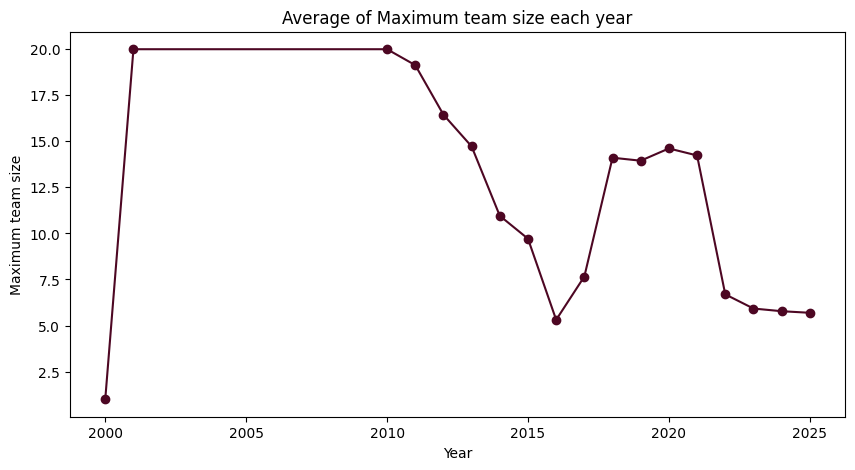

In [241]:
#create line graph for the average maximum team members in competitions per year
team_size_plot=comp.groupby('comp_year')['MaxTeamSize'].mean().plot(kind='line', figsize=(10, 5), color='#4d0723', marker='o')
team_size_plot.set_xlabel('Year')
team_size_plot.set_ylabel('Maximum team size')
team_size_plot.set_title('Average of Maximum team size each year');

In [242]:
comp['RewardType'].value_counts()  #check frequency of rewards

RewardType
USD          518
Knowledge    415
Swag         101
Jobs          14
Kudos         13
Prizes         6
EUR            1
GBP            1
Name: count, dtype: int64

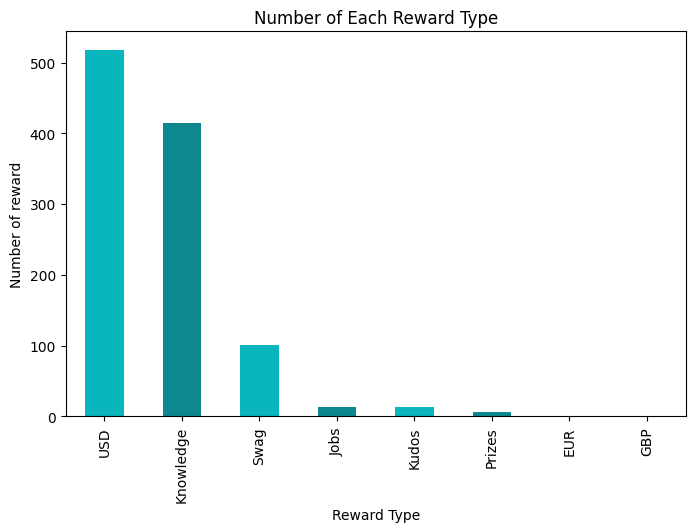

In [243]:
#create bar graph for number of different reward types
comp_reward_plot= comp['RewardType'].value_counts().plot(kind='bar', color=['#0ab6be', '#0c888e'], figsize=(8, 5))
comp_reward_plot.set_xlabel('Reward Type')
comp_reward_plot.set_ylabel('Number of reward')
comp_reward_plot.set_title('Number of Each Reward Type');

In [244]:
#check total number of prizes per year
comp.groupby('comp_year')['NumPrizes'].sum()  

comp_year
2000       1
2001       1
2010      22
2011      39
2012     129
2013     109
2014     110
2015     142
2016     184
2017     228
2018     401
2019    1161
2020    1555
2021    1557
2022    1432
2023    1295
2024    1594
2025     986
Name: NumPrizes, dtype: int64

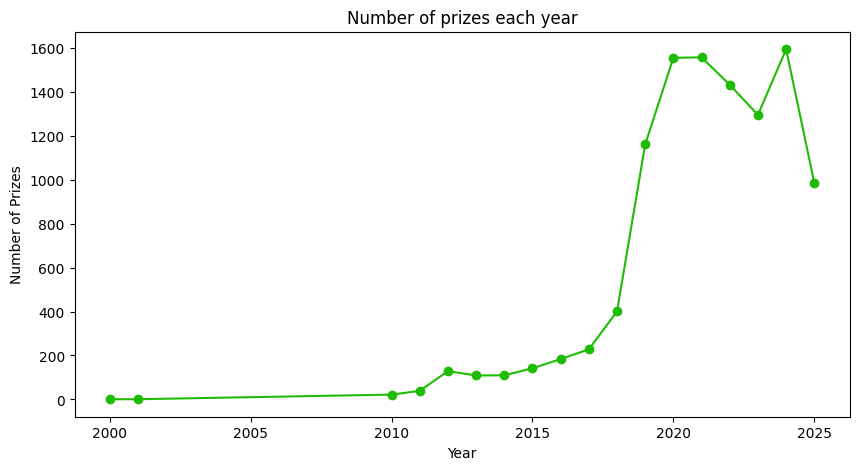

In [245]:
#create line graph for total number of prizes per year
num_prizes_plot=comp.groupby('comp_year')['NumPrizes'].sum().plot(kind='line', figsize=(10, 5), color='#1ebc05', marker='o')
num_prizes_plot.set_xlabel('Year')
num_prizes_plot.set_ylabel('Number of Prizes')
num_prizes_plot.set_title('Number of prizes each year');

In [246]:
comp['comp_year'].value_counts()  #check frequency of years

comp_year
2020    1434
2024    1397
2021    1389
2022    1268
2023    1055
2019    1021
2025     905
2018     616
2017     298
2016     135
2015      80
2014      68
2013      58
2012      56
2011      22
2010      13
2001       1
2000       1
Name: count, dtype: int64

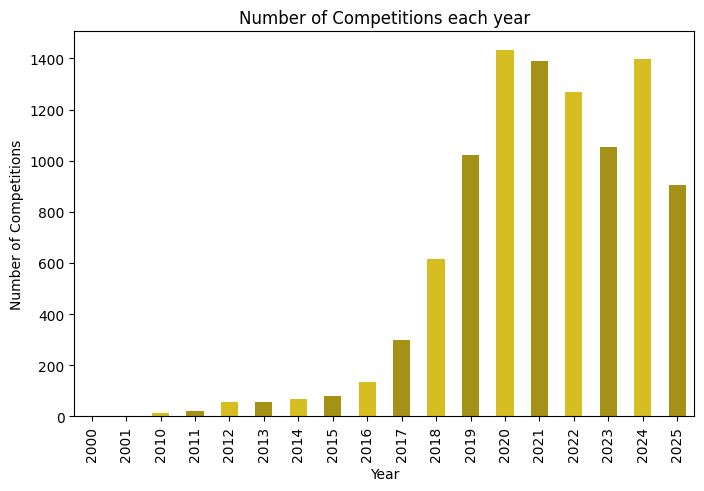

In [247]:
#create bar graph for number of competitions per year
comp_num_plot= comp['comp_year'].value_counts().sort_index().plot(kind='bar', color=['#d6be22', '#a59115'], figsize=(8, 5))
comp_num_plot.set_xlabel('Year')
comp_num_plot.set_ylabel('Number of Competitions')
comp_num_plot.set_title('Number of Competitions each year');

In [248]:
#check number of total competitors per year
comp.groupby('comp_year')['TotalCompetitors'].sum()

comp_year
2000         9
2001        53
2010      1539
2011      5680
2012     24452
2013     13715
2014     28917
2015     45499
2016     58434
2017     75718
2018    116939
2019    125014
2020    115151
2021    133651
2022    130547
2023    133080
2024    156584
2025     74685
Name: TotalCompetitors, dtype: int64

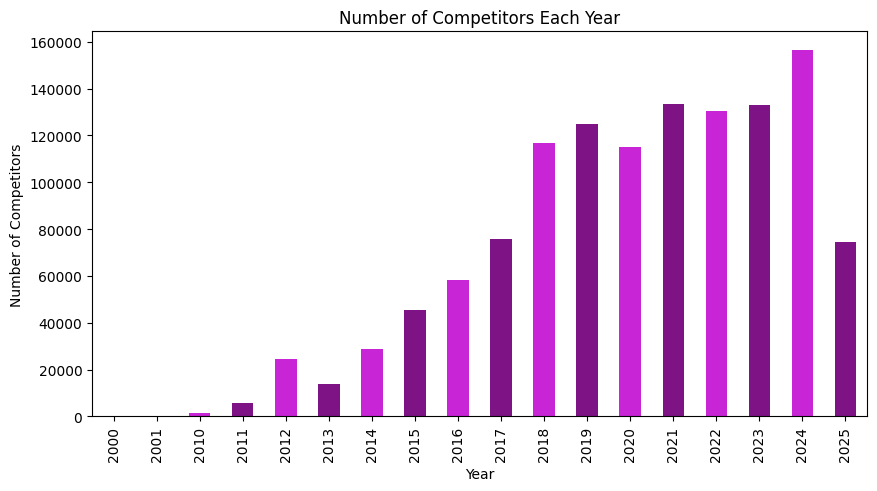

In [249]:
#create bar graph for total number of competitors per year
competitor_plot = comp.groupby('comp_year')['TotalCompetitors'].sum().plot(kind='bar', figsize=(10, 5), color=['#c825d6','#7d1385'])
competitor_plot.set_xlabel('Year')
competitor_plot.set_ylabel('Number of Competitors')
competitor_plot.set_title('Number of Competitors Each Year');

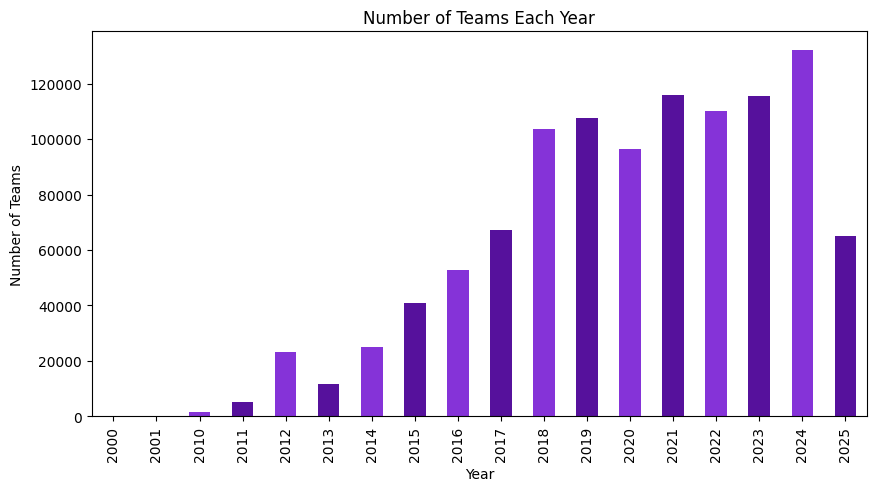

In [250]:
#create bar graph for total number of teams per year
total_teams_plot = comp.groupby('comp_year')['TotalTeams'].sum().plot(kind='bar', figsize=(10, 5), color=['#8533d8','#56119c'])
total_teams_plot.set_xlabel('Year')
total_teams_plot.set_ylabel('Number of Teams')
total_teams_plot.set_title('Number of Teams Each Year');

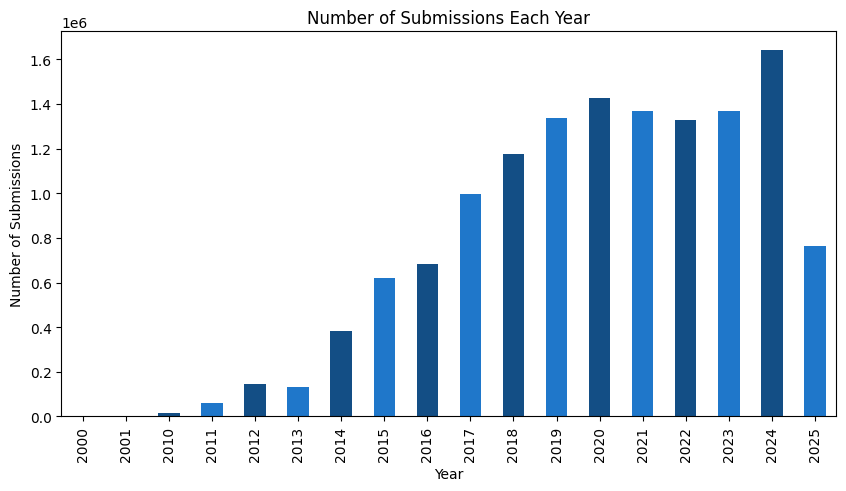

In [251]:
#create bar graph for total number of submissions per year
comp_subm_plot = comp.groupby('comp_year')['TotalSubmissions'].sum().plot(kind='bar', figsize=(10, 5), color=['#134e85','#1f77ca'])
comp_subm_plot.set_xlabel('Year')
comp_subm_plot.set_ylabel('Number of Submissions')
comp_subm_plot.set_title('Number of Submissions Each Year');